In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import math

plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)
# Fix the seed of the random number 
# generator so that your results will match ours
np.random.seed(1)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# envData

In [8]:
envData = pd.read_csv('beijing_17_18_meo.csv')
envData.sample(5)

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
68332,tongzhou_meo,116.756667,39.847500,2017-11-12 22:00:00,0.2,1013.6,92,307.0,1.6,Fog
111218,beijing_meo,116.469444,39.806111,2017-10-01 16:00:00,20.1,1013.7,59,83.0,3.6,Sunny/clear
89701,zhaitang_meo,115.692222,39.973889,2017-04-19 16:00:00,9.4,960.7,22,221.0,2.9,Sunny/clear
78443,chaoyang_meo,116.500833,39.952500,2018-01-07 08:00:00,2.5,1016.2,28,323.0,1.7,Sunny/clear
59545,pinggu_meo,117.117778,40.169444,2017-11-12 15:00:00,-1.1,1012.0,80,296.0,0.9,Haze


In [9]:
envData.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,157813.000000,157813.000000
mean,116.395672,40.047275,38.182775,1026.798200,354.312894,35487.471178,96.933881
std,0.395223,0.264798,5030.694816,5025.748455,17423.723518,184454.823456,9748.857634
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,78.000000,0.900000
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,190.000000,1.500000
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,280.000000,2.500000
max,117.117778,40.658889,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


In [4]:
envData.isnull().any().any()

True

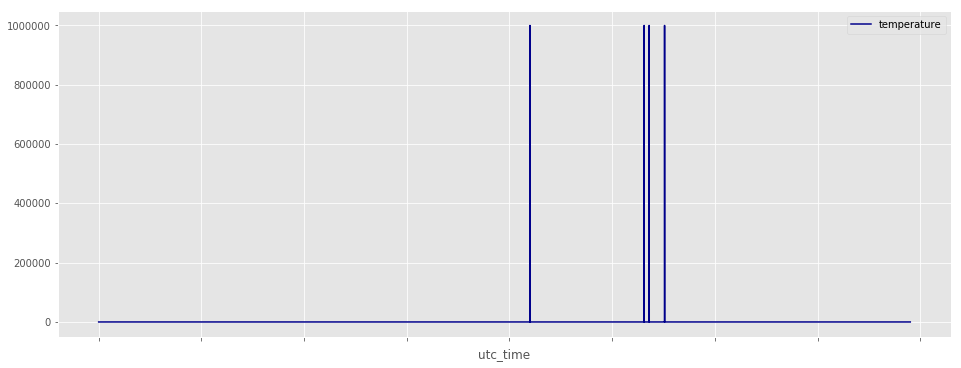

In [5]:
envData[:].plot(x='utc_time', y='temperature',color='DarkBlue',figsize =(16,6))

In [6]:
envData.loc[envData['temperature'] > 50, 'temperature'] = np.NaN
envData.loc[envData['temperature'] < -30, 'temperature'] = np.NaN
envData.loc[envData['pressure'] > 1200, 'pressure'] = np.NaN
envData.loc[envData['humidity'] > 110, 'humidity'] = np.NaN
envData.loc[envData['wind_speed'] > 100, 'wind_speed'] = np.NaN
envData['wind_direction'] += 1.0
envData.loc[(envData['wind_direction'] == 361.0) , 'wind_direction'] = 1.0
envData.loc[(envData['wind_direction'] == 999018.0) , 'wind_direction'] = 0.0
envData.loc[(envData['wind_direction'] > 360) , 'wind_direction'] = np.NaN

envData.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158043.000000,158043.000000,157999.000000,157798.000000,157798.000000
mean,116.395672,40.047275,12.874199,1001.514645,50.621447,170.699945,1.884952
std,0.395223,0.264798,12.079613,20.484143,26.053033,109.452180,1.359832
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,67.000000,0.900000
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,179.000000,1.500000
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,262.000000,2.500000
max,117.117778,40.658889,40.300000,1039.700000,100.000000,360.000000,15.400000


In [7]:
envData['wind_direction'].fillna(method='ffill', inplace=True)
envData_clean = envData.interpolate()
envData_clean.isnull().any().any()

False

In [8]:
envData_clean.describe()

,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed
count,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000,158047.000000
mean,116.395672,40.047275,12.874342,1001.514771,50.612799,170.752763,1.884340
std,0.395223,0.264798,12.079553,20.483929,26.054518,109.442134,1.359182
min,115.692222,39.718611,-21.300000,940.000000,4.000000,0.000000,0.000000
25%,116.194167,39.847500,2.500000,994.200000,27.000000,67.000000,0.900000
50%,116.290556,39.973889,13.800000,1005.600000,48.000000,179.000000,1.500000
75%,116.626944,40.223333,23.200000,1016.900000,73.000000,262.000000,2.500000
max,117.117778,40.658889,40.300000,1039.700000,100.000000,360.000000,15.400000


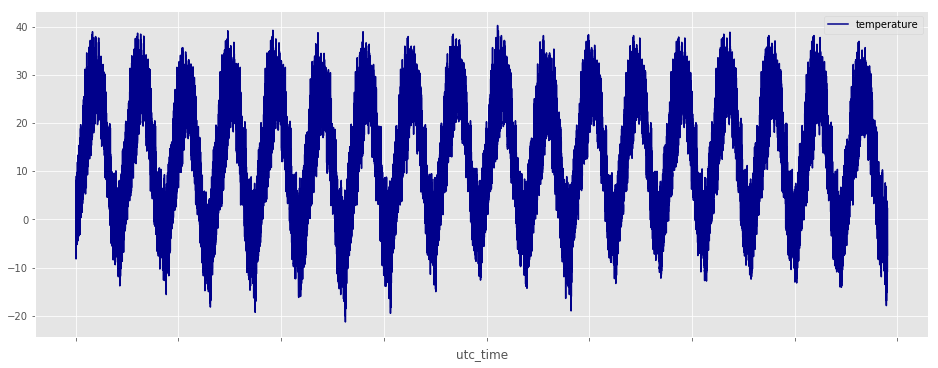

In [9]:
envData_clean[:].plot(x='utc_time', y='temperature',color='DarkBlue',figsize =(16,6))

In [10]:
envData_clean['station_id'].value_counts()

zhaitang_meo       8781
fangshan_meo       8781
shijingshan_meo    8781
daxing_meo         8781
shangdianzi_meo    8781
chaoyang_meo       8781
yanqing_meo        8781
shunyi_meo         8781
miyun_meo          8781
pingchang_meo      8781
fengtai_meo        8780
mentougou_meo      8780
hadian_meo         8780
xiayunling_meo     8780
huairou_meo        8780
tongzhou_meo       8780
pinggu_meo         8779
beijing_meo        8778
Name: station_id, dtype: int64

In [11]:
# envData_clean.to_csv('envData_clean.csv')

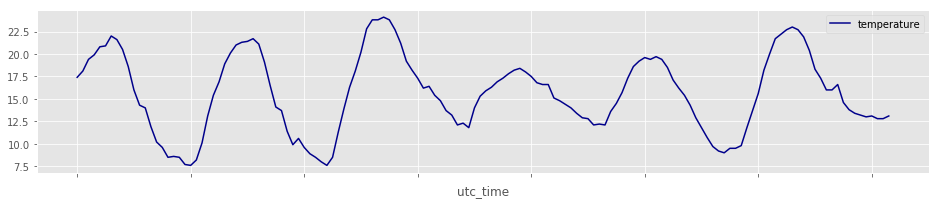

In [41]:
envData_clean_4 = envData_clean[98036:98755]
envData_clean_4[:144].plot(x='utc_time', y='temperature',color='DarkBlue',figsize =(16,3))

# airData

In [12]:
airData = pd.read_csv('beijing_17_18_aq.csv')
airData.sample(5)

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
220356,tongzhou_aq,2017-11-19 12:00:00,128.0,165.0,104.0,1.3,2.0,18.0
205787,tiantan_aq,2017-03-03 12:00:00,88.0,123.0,63.0,1.1,46.0,13.0
112463,huairou_aq,2017-09-27 19:00:00,6.0,20.0,5.0,0.2,54.0,2.0
290940,yufa_aq,2017-10-29 12:00:00,19.0,45.0,31.0,0.6,14.0,2.0
284915,yufa_aq,2017-01-25 12:00:00,249.0,NaN,64.0,0.3,39.0,35.0


In [13]:
airData.describe()

,PM2.5,PM10,NO2,CO,O3,SO2
count,290621.000000,227747.000000,292359.000000,268197.000000,290589.000000,292462.000000
mean,58.785570,88.059259,45.792457,0.960677,55.692755,8.981003
std,66.113851,89.292875,32.065045,1.001856,53.821424,11.702594
min,2.000000,5.000000,1.000000,0.100000,1.000000,1.000000
25%,16.000000,37.000000,20.000000,0.400000,12.000000,2.000000
50%,39.000000,70.000000,39.000000,0.700000,45.000000,5.000000
75%,77.000000,113.000000,66.000000,1.200000,79.000000,11.000000
max,1004.000000,3000.000000,300.000000,15.000000,504.000000,307.000000


In [14]:
airData['stationId'].value_counts()

miyunshuiku_aq       8886
shunyi_aq            8886
liulihe_aq           8886
wanliu_aq            8886
miyun_aq             8886
guanyuan_aq          8886
pinggu_aq            8886
yizhuang_aq          8886
tongzhou_aq          8886
daxing_aq            8886
xizhimenbei_aq       8886
dongsi_aq            8886
huairou_aq           8886
wanshouxigong_aq     8886
yanqin_aq            8886
zhiwuyuan_aq         8886
dingling_aq          8886
yungang_aq           8886
donggaocun_aq        8886
qianmen_aq           8886
yongdingmennei_aq    8886
dongsihuan_aq        8886
fengtaihuayuan_aq    8886
mentougou_aq         8886
fangshan_aq          8886
nongzhanguan_aq      8886
yufa_aq              8886
badaling_aq          8886
pingchang_aq         8886
beibuxinqu_aq        8886
yongledian_aq        8886
aotizhongxin_aq      8886
tiantan_aq           8886
nansanhuan_aq        8886
gucheng_aq           8886
Name: stationId, dtype: int64

In [33]:
airData.isnull().any()

stationId    False
utc_time     False
PM2.5         True
PM10          True
NO2           True
CO            True
O3            True
SO2           True
dtype: bool

In [16]:
airData_ok = airData.dropna()
airData_ok.isnull().any().any()

False

In [17]:
airData_ok.describe()

,PM2.5,PM10,NO2,CO,O3,SO2
count,200390.000000,200390.000000,200390.000000,200390.000000,200390.000000,200390.000000
mean,48.991187,83.762388,45.994067,0.867201,54.285888,8.314572
std,54.338376,68.971294,31.442348,0.832099,53.872910,11.007739
min,3.000000,6.000000,2.000000,0.100000,2.000000,2.000000
25%,13.000000,36.000000,20.000000,0.400000,10.000000,2.000000
50%,34.000000,68.000000,40.000000,0.700000,44.000000,4.000000
75%,66.000000,112.000000,67.000000,1.100000,76.000000,10.000000
max,1000.000000,3000.000000,300.000000,15.000000,500.000000,300.000000


In [18]:
airData_ok['stationId'].value_counts()

daxing_aq            6806
mentougou_aq         6639
badaling_aq          6566
fangshan_aq          6536
dongsi_aq            6520
tiantan_aq           6470
gucheng_aq           6419
yungang_aq           6385
fengtaihuayuan_aq    6385
pingchang_aq         6381
wanliu_aq            6284
guanyuan_aq          6284
aotizhongxin_aq      6134
yizhuang_aq          6092
wanshouxigong_aq     6068
miyun_aq             6005
dingling_aq          6003
yanqin_aq            5994
nongzhanguan_aq      5977
shunyi_aq            5893
beibuxinqu_aq        5842
huairou_aq           5815
tongzhou_aq          5660
xizhimenbei_aq       5554
qianmen_aq           5389
yongdingmennei_aq    5275
yongledian_aq        4997
pinggu_aq            4905
yufa_aq              4832
nansanhuan_aq        4726
dongsihuan_aq        4638
miyunshuiku_aq       4604
liulihe_aq           4411
donggaocun_aq        3956
zhiwuyuan_aq         3945
Name: stationId, dtype: int64

In [19]:
airData_ok.to_csv('airData_ok.csv')

# geoData

In [20]:
geoData = pd.read_csv('Beijing_Stations.csv')
geoData[:]

,Station ID,longitude,latitude
0,dongsi_aq,116.417,39.929
1,tiantan_aq,116.407,39.886
2,guanyuan_aq,116.339,39.929
3,wanshouxigong_aq,116.352,39.878
4,aotizhongxin_aq,116.397,39.982
5,nongzhanguan_aq,116.461,39.937
6,wanliu_aq,116.287,39.987
7,beibuxinqu_aq,116.174,40.090
8,zhiwuyuan_aq,116.207,40.002
9,fengtaihuayuan_aq,116.279,39.863


# geoData

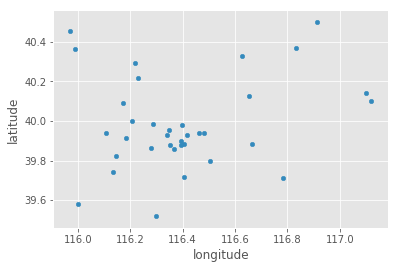

In [21]:
geoData.plot.scatter(x = 'longitude', y = 'latitude')

# gridData

In [22]:
gridData = pd.read_csv('https://biendata.com/competition/meteorology/bj_grid/2018-04-01-17/2018-04-22-17/2k0d1d8')

In [23]:
gridData.isnull().any().any()

False

In [24]:
gridData.tail()

,id,station_id,time,weather,temperature,pressure,humidity,wind_direction,wind_speed
324810,2813858,beijing_grid_646,2018-04-22 17:00:00,CLOUDY,10.2,956.0008,79.0,329.16,6.65
324811,2813859,beijing_grid_647,2018-04-22 17:00:00,CLOUDY,10.2,960.8503,77.0,313.71,5.53
324812,2813860,beijing_grid_648,2018-04-22 17:00:00,CLOUDY,10.2,962.3300,74.0,299.15,4.98
324813,2813861,beijing_grid_649,2018-04-22 17:00:00,CLOUDY,9.8,960.4399,70.0,288.73,4.69
324814,2813862,beijing_grid_650,2018-04-22 17:00:00,CLOUDY,9.8,958.5498,67.0,277.39,4.58


In [25]:
gridData.describe()

,id,temperature,pressure,humidity,wind_direction,wind_speed
count,3.248150e+05,324815.000000,324815.000000,324815.000000,324815.000000,324815.000000
mean,2.432190e+06,12.092984,966.601251,43.707150,183.344591,13.556711
std,2.204513e+05,7.335005,48.041151,20.907601,102.102311,8.898154
min,2.050704e+06,-12.000000,829.893800,6.000000,0.000000,0.010000
25%,2.241254e+06,7.000000,930.013800,27.000000,96.530000,7.070000
50%,2.431802e+06,12.000000,977.638300,39.000000,184.520000,11.310000
75%,2.623272e+06,17.000000,1009.937750,58.000000,279.780000,17.820000
max,2.813862e+06,33.000000,1030.451900,100.000000,360.000000,62.380000


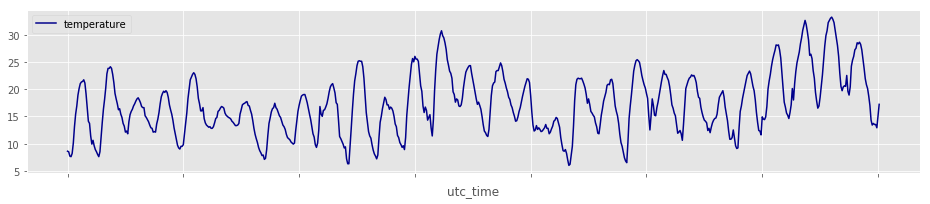

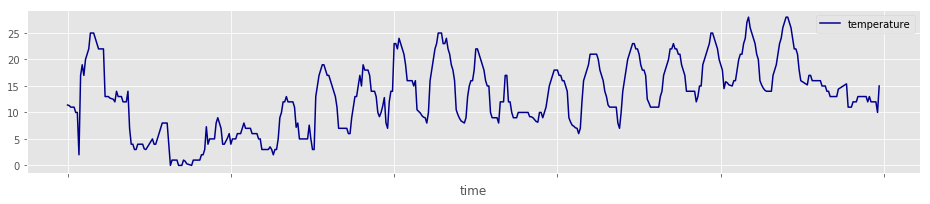

In [45]:
envData_clean_4[17:].plot(x='utc_time', y='temperature',color='DarkBlue',figsize =(16,3))
gridData_group = gridData.groupby(['station_id'])
gridData_group.get_group('beijing_grid_240')[:].plot(x='time', y='temperature',color='DarkBlue',figsize =(16,3))
# gridData[:144].plot(x='time', y='pressure',color='DarkBlue',figsize =(16,3))
# gridData[:144].plot(x='time', y='humidity',color='DarkBlue',figsize =(16,3))
# gridData[:144].plot(x='time', y='wind_speed',color='DarkBlue',figsize =(16,3))
# gridData[:144].plot(x='time', y='wind_direction',color='DarkBlue',figsize =(16,3))

In [27]:
# gridData.to_csv('gridData_0401to0422.csv')

# realTimeWeatherData

In [2]:
weather_04 = pd.read_csv('https://biendata.com/competition/meteorology/bj/2018-04-01-17/2018-05-01-00/2k0d1d8')

In [3]:
weather_04.sample(5)

,id,station_id,time,weather,temperature,pressure,humidity,wind_speed,wind_direction
9430,2862200,yanqing_meo,2018-04-24 00:00:00,Sunny/clear,9.9,966.4,70.0,1.6,241.0
4854,2465241,shunyi_meo,2018-04-13 03:00:00,Sunny/clear,10.2,1020.0,77.0,1.3,172.0
6321,2592451,beijing_meo,2018-04-16 14:00:00,Sunny/clear,18.4,1010.4,43.0,4.5,196.0
6265,2587850,zhaitang_meo,2018-04-16 11:00:00,Sunny/clear,18.0,960.8,33.0,5.9,173.0
10836,2995403,huairou_meo,2018-04-27 15:00:00,Sunny/clear,15.6,1005.5,66.0,0.8,1.0


In [4]:
weather_04.describe()

,id,temperature,pressure,humidity,wind_speed,wind_direction
count,1.227400e+04,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000
mean,2.580181e+06,829.425086,1894.360885,865.115366,817.068519,38910.626202
std,3.075167e+05,28532.566306,29894.537147,28531.556888,28532.918387,192861.579851
min,2.050685e+06,-2.600000,944.200000,6.000000,0.000000,0.000000
25%,2.315845e+06,10.000000,996.200000,28.000000,1.100000,82.000000
50%,2.577116e+06,14.900000,1005.400000,48.000000,1.900000,187.000000
75%,2.839251e+06,19.900000,1011.900000,70.750000,3.100000,267.000000
max,3.118041e+06,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


In [5]:
weather_04.loc[weather_04['temperature'] > 50, 'temperature'] = np.NaN
weather_04.loc[weather_04['temperature'] < -30, 'temperature'] = np.NaN
weather_04.loc[weather_04['pressure'] > 1200, 'pressure'] = np.NaN
weather_04.loc[weather_04['humidity'] > 110, 'humidity'] = np.NaN
weather_04.loc[weather_04['wind_speed'] > 100, 'wind_speed'] = np.NaN
weather_04['wind_direction'] += 1.0
weather_04.loc[(weather_04['wind_direction'] == 361.0) , 'wind_direction'] = 1.0
weather_04.loc[(weather_04['wind_direction'] == 999018.0) , 'wind_direction'] = 0.0
weather_04.loc[(weather_04['wind_direction'] > 360) , 'wind_direction'] = np.NaN

weather_04.describe()

,id,temperature,pressure,humidity,wind_speed,wind_direction
count,1.227400e+04,12264.000000,12263.000000,12264.000000,12264.000000,12264.000000
mean,2.580181e+06,14.707559,999.053780,50.426941,2.340917,167.471624
std,3.075167e+05,6.874982,19.116184,24.594897,1.705797,105.185384
min,2.050685e+06,-2.600000,944.200000,6.000000,0.000000,0.000000
25%,2.315845e+06,10.000000,996.200000,28.000000,1.100000,73.000000
50%,2.577116e+06,14.900000,1005.400000,48.000000,1.900000,175.000000
75%,2.839251e+06,19.900000,1011.900000,70.000000,3.100000,247.000000
max,3.118041e+06,31.700000,1028.300000,99.000000,13.200000,360.000000


In [6]:
weather_04['wind_direction'].fillna(method='ffill', inplace=True)
weather_04_clean = weather_04.interpolate()
weather_04_clean.isnull().any().any()

False

In [7]:
weather_04_clean.describe()

,id,temperature,pressure,humidity,wind_speed,wind_direction
count,1.227400e+04,12274.000000,12274.000000,12274.000000,12274.000000,12274.000000
mean,2.580181e+06,14.700248,999.062600,50.420075,2.340863,167.547499
std,3.075167e+05,6.880294,19.113281,24.591190,1.705213,105.203340
min,2.050685e+06,-2.600000,944.200000,6.000000,0.000000,0.000000
25%,2.315845e+06,10.000000,996.200000,28.000000,1.100000,73.000000
50%,2.577116e+06,14.900000,1005.400000,48.000000,1.900000,175.000000
75%,2.839251e+06,19.900000,1011.900000,70.000000,3.100000,247.000000
max,3.118041e+06,31.700000,1028.300000,99.000000,13.200000,360.000000


In [8]:
weather_04_clean['station_id'].value_counts()

xiayunling_meo     687
mentougou_meo      684
pingchang_meo      683
zhaitang_meo       683
beijing_meo        683
yanqing_meo        683
shijingshan_meo    683
huairou_meo        682
shangdianzi_meo    682
pinggu_meo         682
shunyi_meo         682
daxing_meo         681
chaoyang_meo       681
fangshan_meo       681
fengtai_meo        680
hadian_meo         680
tongzhou_meo       680
miyun_meo          677
Name: station_id, dtype: int64

In [9]:
weather_04_clean.to_csv('weatherData_0401to0501_clean.csv')

# realTimeAirData

In [10]:
airData_04 = pd.read_csv('https://biendata.com/competition/airquality/bj/2018-04-01-17/2018-05-01-00/2k0d1d8')

In [11]:
airData_04.head()

,id,station_id,time,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
0,2943158,dongsi_aq,2018-04-01 17:00:00,145.0,208.0,102.0,1.0,44.0,14.0
1,2943159,tiantan_aq,2018-04-01 17:00:00,132.0,174.0,95.0,1.0,24.0,2.0
2,2943160,guanyuan_aq,2018-04-01 17:00:00,138.0,187.0,86.0,0.9,52.0,10.0
3,2943161,wanshouxigong_aq,2018-04-01 17:00:00,132.0,155.0,75.0,0.9,44.0,11.0
4,2943162,aotizhongxin_aq,2018-04-01 17:00:00,149.0,195.0,105.0,1.0,34.0,9.0


In [12]:
airData_04.describe()

,id,PM25_Concentration,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration
count,2.292500e+04,21703.000000,18179.000000,21891.000000,21894.000000,21747.000000,21925.000000
mean,2.961962e+06,60.354605,128.839100,42.647526,0.705230,77.227434,6.621345
std,1.085639e+04,57.839756,94.788364,30.180482,0.497111,53.415070,7.666073
min,2.943158e+06,3.000000,6.000000,2.000000,0.100000,2.000000,2.000000
25%,2.952586e+06,18.000000,59.000000,20.000000,0.300000,38.000000,2.000000
50%,2.961954e+06,38.000000,111.000000,35.000000,0.600000,73.000000,3.000000
75%,2.971399e+06,90.000000,181.000000,60.000000,0.900000,102.000000,9.000000
max,2.980767e+06,396.000000,2030.000000,249.000000,4.300000,342.000000,300.000000


In [13]:
airData_04.isnull().any()

id                    False
station_id            False
time                  False
PM25_Concentration     True
PM10_Concentration     True
NO2_Concentration      True
CO_Concentration       True
O3_Concentration       True
SO2_Concentration      True
dtype: bool

In [14]:
airData_04_clean = airData_04.interpolate()
airData_04_clean.isnull().any()

id                    False
station_id            False
time                  False
PM25_Concentration    False
PM10_Concentration    False
NO2_Concentration     False
CO_Concentration      False
O3_Concentration      False
SO2_Concentration     False
dtype: bool

C:\Users\Nobody\Anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


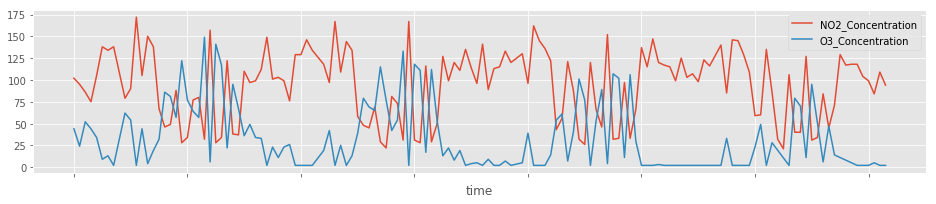

In [15]:
# airData_04_clean[:144].plot(x='time', y=['PM25_Concentration', 'PM10_Concentration'],figsize =(16,3))
# airData_04_clean[:144].plot(x='time', y='PM10_Concentration',color='DarkBlue',figsize =(16,3))
airData_04_clean[:144].plot(x='time', y=['NO2_Concentration', 'O3_Concentration'],figsize =(16,3))

# airData_04_clean[:144].plot(x='time', y='NO2_Concentration',color='DarkBlue',figsize =(16,3))
# airData_04_clean[:144].plot(x='time', y='CO_Concentration',color='DarkBlue',figsize =(16,3))
# airData_04_clean[:144].plot(x='time', y='O3_Concentration',color='DarkBlue',figsize =(16,3))
# airData_04_clean[:144].plot(x='time', y='SO2_Concentration',color='DarkBlue',figsize =(16,3))

In [16]:
airData_04_clean.to_csv('airData_0401to0501_clean.csv')

# trytry

In [ ]:
station_air = pd.read_csv('airData_0401to0422_clean.csv').drop(['Unnamed: 0'],axis=1)

In [ ]:
station_air.sample(5)

In [ ]:
station_air.describe()

In [ ]:
grids_air = pd.read_csv('gridData_0401to0422.csv').drop(['Unnamed: 0'],axis=1)

In [ ]:
grids_air.sample(5)

In [ ]:
grids_group = gridData.groupby(['station_id'])

In [ ]:
grids_group.size()

In [ ]:
picked = ['beijing_grid_217','beijing_grid_219', 'beijing_grid_222', 'beijing_grid_280', 'beijing_grid_364'\
              ,'beijing_grid_366','beijing_grid_369']
    
grid_air_picked = pd.concat([grids_group.get_group(g) for g in picked])

In [ ]:
grid_air_picked.head()

In [ ]:
grid_air_picked.groupby('station_id').size()

In [ ]:
station_air